In [1]:
# add parent dir to syspath
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

In [2]:
from imgGen_augmented import synth_generator
from imgGen_simple import synth_generator as s_generator
import numpy as np
from matplotlib import pyplot as plt
import load_digits
import cv2
from pathlib import Path
from time import time
from ganMetrics.FID import FID_interface
from imageGenerators import load_digits, load_realdata


In [3]:
targetDims = (512, 128)

In [4]:
def showImage(image):
    plt.imshow(image, cmap="gray", vmin=0, vmax=255)
    plt.show()
def showImages(images, n=None):
    if n is None:
        n = len(images)
    for i in range(min(n, len(images))):
        image = images[i]
        showImage(image)

In [5]:
gen = synth_generator()
images = gen.digitImages
#for image in images:
#    print(image.shape)
#showImages(images)

In [6]:
labels = np.random.randint(0,20,(1000,5))
images = []
starttime = time()
for label in labels:
    image = gen.makeImage(label)        
    image = gen.color_image(image)
    image = gen.rotateAndCrop(image, maxAngle=1, crop=2)
    images.append(image)
print("generating images took %f seconds" % (time() - starttime) )
"""for i, image in enumerate(images):
    filepath = Path("D:/m2/test/dataset/%d.png" % (i) )
    cv2.imwrite(str(filepath), image)
txt = ""
for i, label in enumerate(labels):
    txt += "%d.png\t%s\n" % (i, str(label))
txtFile = Path("D:/m2/test/dataset/labels.txt" )
txtFile.touch()
txtFile.write_text(txt)
"""

generating images took 12.492177 seconds


'for i, image in enumerate(images):\n    filepath = Path("D:/m2/test/dataset/%d.png" % (i) )\n    cv2.imwrite(str(filepath), image)\ntxt = ""\nfor i, label in enumerate(labels):\n    txt += "%d.png\t%s\n" % (i, str(label))\ntxtFile = Path("D:/m2/test/dataset/labels.txt" )\ntxtFile.touch()\ntxtFile.write_text(txt)\n'

C:\Users\andre\jupyter_ws\imageGenerators\load_realdata.py:57: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(txt_path, sep=seperators ,header=None)


real images:


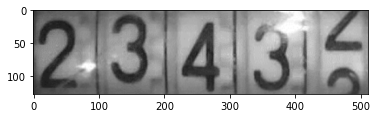

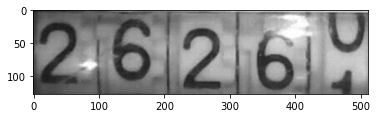

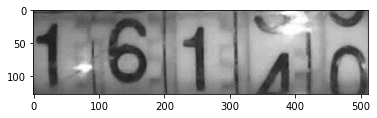

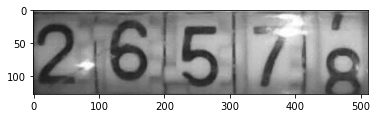

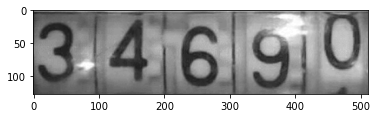

synthetic images:


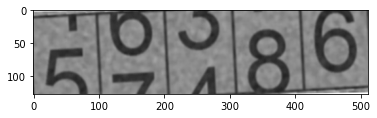

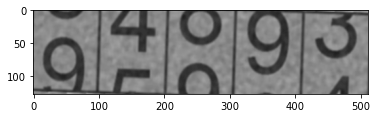

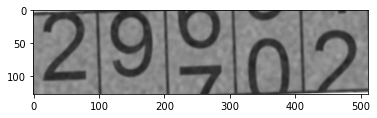

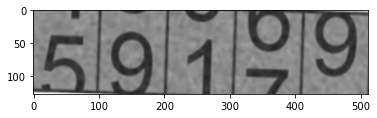

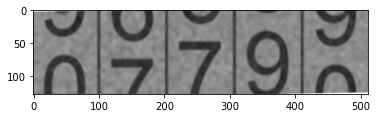

(1000, 128, 512)
(1000, 128, 512)


In [7]:
images_easy, labels_easy = load_realdata.load_wmr_easy(resizeTo=targetDims)
images = np.array([
    cv2.resize(image, targetDims) for image in images
])
print("real images:")
showImages(images_easy, 5)
print("synthetic images:")
showImages(images, 5)
print(images_easy.shape)
print(images.shape)

# fid between real easy and newGen images

In [8]:
fid = FID_interface.calculate_fid(images_easy, images)
print(fid)

154.9223746917366


# fid between real easy and oldGen images

(1000, 128, 512)


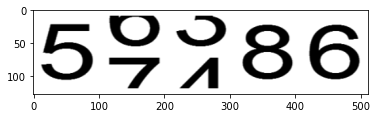

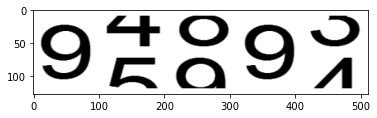

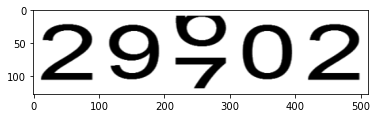

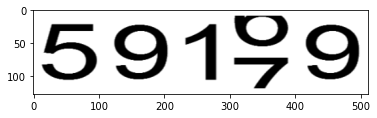

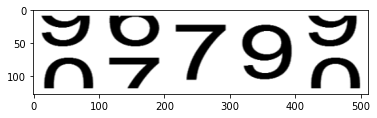

In [9]:
s_gen = s_generator()
images_simpleGen = s_gen.generate_images(labels, 20, (10,10,10,10), width=targetDims[0], height=targetDims[1])

print(images_simpleGen.shape)
showImages(images_simpleGen, 5)

In [10]:

fid = FID_interface.calculate_fid(images_easy, images_simpleGen)
print(fid)

266.56054360983137
